In [1]:
import skimage
from skimage import io
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage.filters import laplace
from skimage.filters import unsharp_mask
%matplotlib inline

In [4]:
cd CampFire

/home/jovyan/Fires/TIFF_Files/CampFire


In [5]:
practice = io.imread('GOES-17_ABI_RadC_C14_20181116_180619_cali.tif')

In [6]:
type(practice)

numpy.ndarray

In [7]:
practice.min(), practice.max()

(53, 255)

In [8]:
practice.shape

(556, 541, 2)

In [9]:
practice.dtype

dtype('uint8')

In [10]:
firstChannel = np.squeeze(practice[:,:,0])

In [11]:
secondChannel = np.squeeze(practice[:,:,1])

In [12]:
newimage = firstChannel[125:250,300:450]

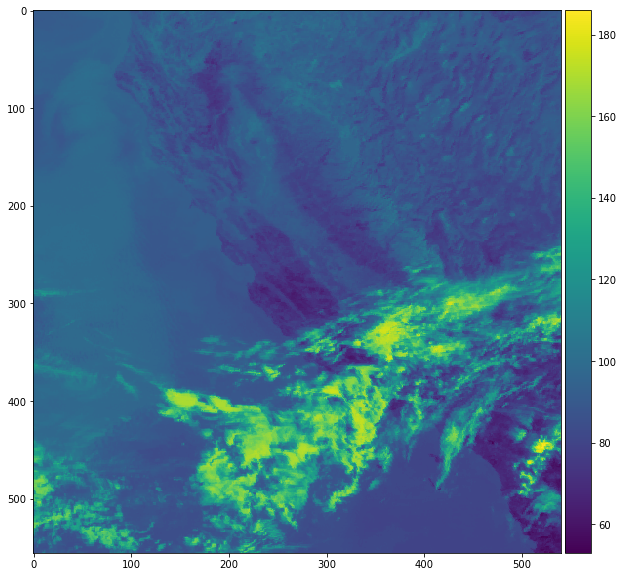

In [13]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(firstChannel,interpolation='nearest')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)

In [17]:
height, width = newimage.shape
print("height: ", height, "width: ", width, "type: ", type(firstChannel))

height:  125 width:  150 type:  <class 'numpy.ndarray'>


In [18]:
smallChannel = resize(newimage, (round(height/2), round(width/2)))*255

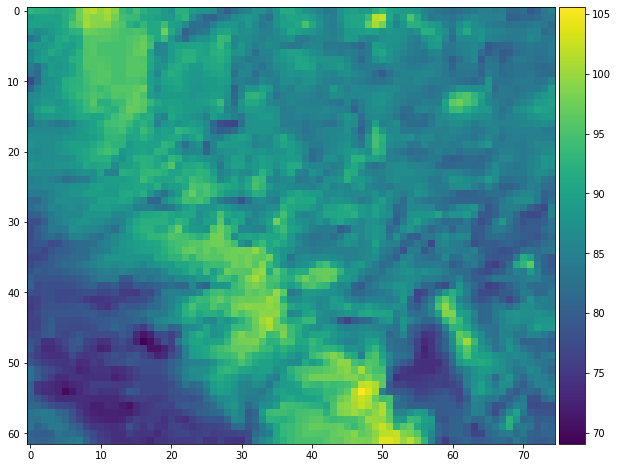

In [19]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(smallChannel,interpolation='nearest')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)

In [20]:
blurryChannel = resize(smallChannel, (height, width))

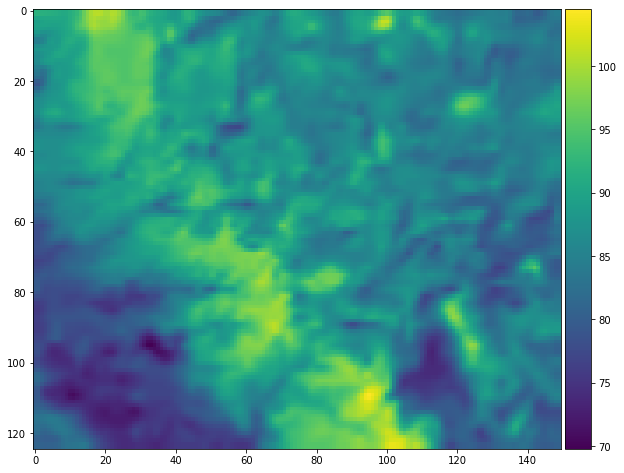

In [21]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(blurryChannel,interpolation='nearest')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)

In [22]:
details = firstChannel - blurryChannel

ValueError: operands could not be broadcast together with shapes (556,541) (125,150) 

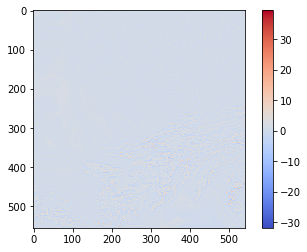

In [54]:
fig, ax = plt.subplots(1,1)
im=ax.imshow(details,cmap=plt.get_cmap('coolwarm'))
fig.colorbar(im)

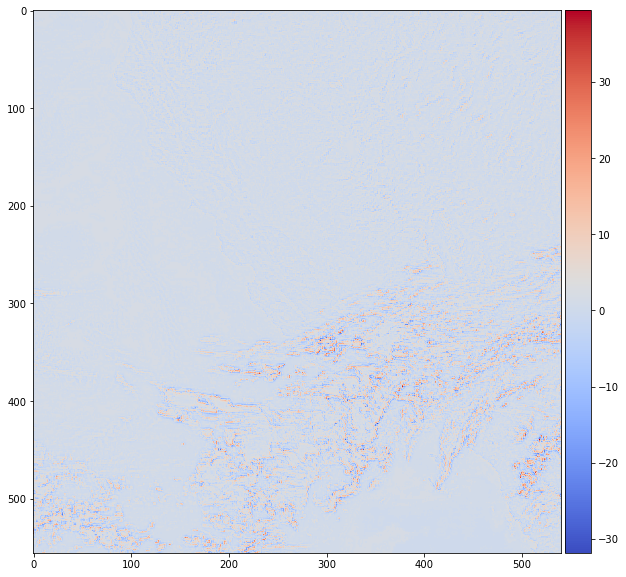

In [55]:

fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(details,cmap=plt.get_cmap('coolwarm'),interpolation='nearest')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)


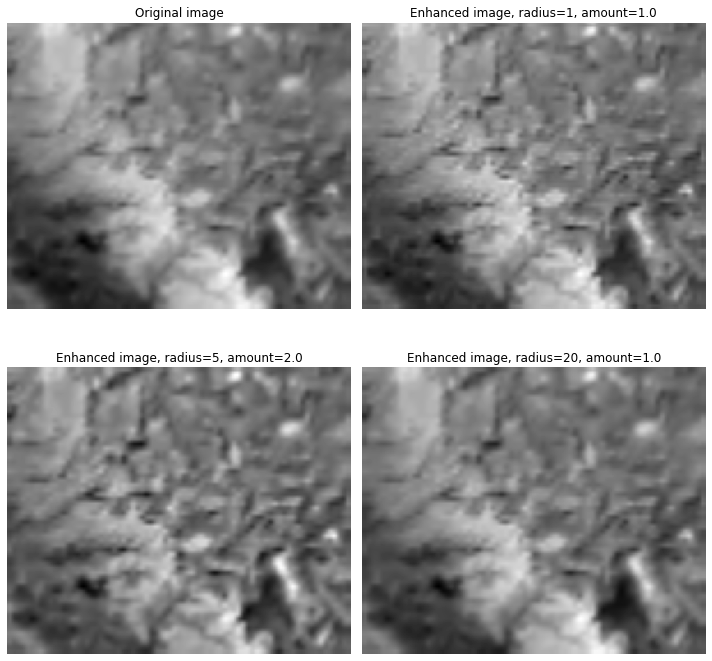

In [23]:
image = blurryChannel
image = (1.0/255.0)*image
result_1 = unsharp_mask(image, radius=1, amount=1.5)
result_2 = unsharp_mask(image, radius=5, amount=2)
result_3 = unsharp_mask(image, radius=20, amount=1)

fig, axes = plt.subplots(nrows=2, ncols=2,
                         sharex=True, sharey=True, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(result_1, cmap=plt.cm.gray)
ax[1].set_title('Enhanced image, radius=1, amount=1.0')
ax[2].imshow(result_2, cmap=plt.cm.gray)
ax[2].set_title('Enhanced image, radius=5, amount=2.0')
ax[3].imshow(result_3, cmap=plt.cm.gray)
ax[3].set_title('Enhanced image, radius=20, amount=1.0')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

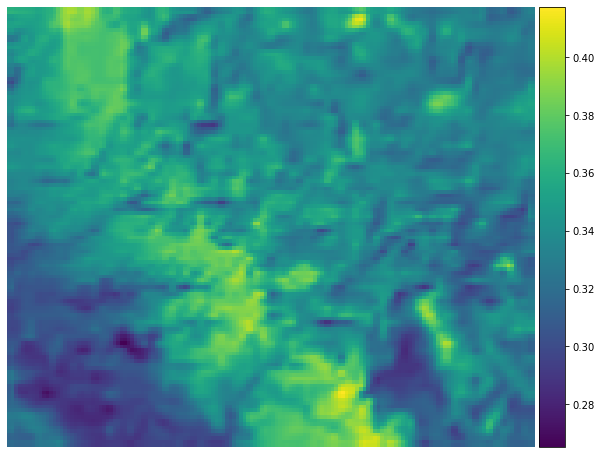

In [25]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
image = blurryChannel
image = (1.0/255.0)*image
result_1 = unsharp_mask(image, radius=1, amount=1.5)
im = ax.imshow(result_1,interpolation='nearest')
#ax.set_title('Sharpened Image Using Unsharp Mask',fontsize = 32,fontname = 'serif')
ax.axis('off')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)



# fig, axes = plt.subplots(1,1, figsize=(10, 15))
# # ax = axes.ravel()

# im = ax.imshow(result_1, cmap=plt.cm.gray)
# ax.set_title('Sharpened Image Using Unsharp Mask',fontsize = 10,fontname = 'sans-serif')

# for a in ax:
#     a.axis('off')
# fig.tight_layout()
plt.show()

In [57]:
##fig, ax = plt.subplots(1,1)
##im=ax.scatter(details,laplace_edges, alpha=0.01,s=0.5)

In [20]:
firstChannel.min(), firstChannel.max()

(0, 136)

In [21]:
result_1.min(), result_1.max()

(0.029291810164140758, 0.4917195191069807)

In [22]:
firstChannel_edit = (1.0/255.0)*firstChannel
abs_error1 = abs(firstChannel_edit-result_1)

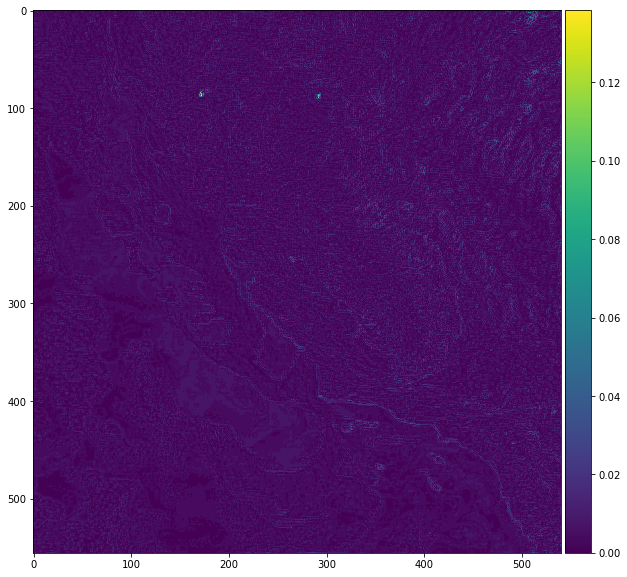

In [23]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(abs_error1,interpolation='nearest')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)

In [24]:
abs_error2 = abs(firstChannel_edit-result_2)

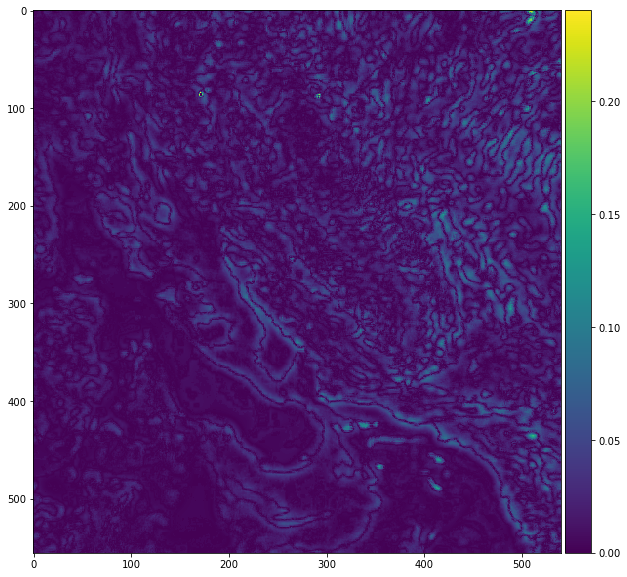

In [25]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(abs_error2,interpolation='nearest')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)

In [26]:
abs_error3 = abs(firstChannel_edit-result_3)

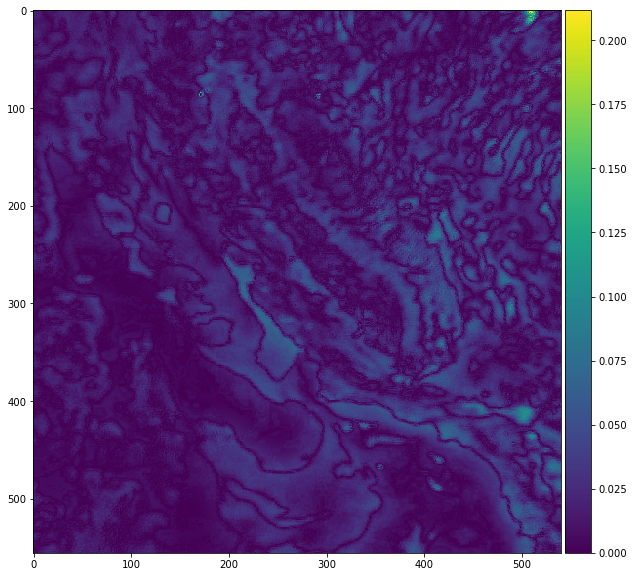

In [27]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(abs_error3,interpolation='nearest')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)

In [28]:
abs_error1.max(), abs_error1.mean(), abs_error1.std()

(0.13840474207069525, 0.0048364753473255475, 0.0038493051616597463)

In [29]:
abs(details- result_1).max(), abs(details- result_1).mean()

(41.11194140257968, 1.1873970313916595)

In [30]:
np.sqrt(((details- result_1)**2).mean())

1.5871046739078036